In [1]:
## calculates the error metrics in order to evaluate all casues vs casue-specific; and also with covariates vs without covariates

In [1]:
# import libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import itertools
import statsmodels.api as sm
import os
from joblib import Parallel, delayed
import patchworklib as pw

/Users/guopeihong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<Figure size 100x100 with 0 Axes>

In [2]:
from epiweeks import Week, Year
from datetime import date
def create_epiweek(date):
    return Week.fromdate(date)
def create_epiweekplot(epiweek):
    epiweek = str(epiweek)
    return F'Y{epiweek[:4]}W{epiweek[4:]}'
def create_epiweek_fromstr(str):
    return Week.fromstring(str)

## For analysis of all causes versus adding up cause-specific

In [37]:
## create the pred_add dataset
def add_up(filename, target_variables, pred_add_directory):

    result_df = None
    for target_var in target_variables:
        pred_file = os.path.join(target_var, 'pred', filename)
        if os.path.isfile(pred_file):
            y_pred = pd.read_csv(pred_file, parse_dates = [0], dayfirst = True, encoding='utf-8')
            y_pred['epiweek'] = y_pred['epiweek'].apply(create_epiweek_fromstr)
            y_pred = y_pred.set_index('epiweek')
            y_pred = y_pred[[target_var, 'ridge', 'lasso', 'alasso', 'sgl', 'elasticnet', 'aenet', 'randomforest', 'knn', 'xgboost', 'lightgbm']]
            y_pred.rename(columns={target_var: 'all causes'}, inplace=True)        
            # Add y_pred to the result_df
            if result_df is None:
                result_df = y_pred  # Initialize with the first DataFrame
            else:
                result_df += y_pred 
    
    output_file = os.path.join(pred_add_directory, filename)
    result_df.to_csv(output_file)

In [38]:
target_variables = []
with open('target_variables.txt', 'r') as file:
    for line in file:
        # Remove linebreak which is the last character of the string
        target_variable = line[:-1]
        # Add item to the list
        target_variables.append(target_variable)
print(target_variables)

pred_add_directory = os.path.join('all causes', 'pred_add')
if not os.path.exists(pred_add_directory):
    os.makedirs(pred_add_directory)
    
filenames = []
for i in range(1, 13):
    filenames.append(f'L8_S{i}.csv')



Parallel(n_jobs=12, verbose=51)(delayed(add_up)(filename, target_variables, pred_add_directory) for filename in filenames)


['Cardiovascular disease', 'Chronic respiratory disease', 'Factors influencing health status and contact with health services', 'Digestive disease', 'Endocrine disorders', 'Malignant neoplasms', 'Diabetes mellitus', 'Genitourinary disorders', 'Musculoskeletal disease', 'Infectious and Parasitic Diseases', 'Ill-defined diseases', 'Neurological and sense disorders', 'Oral Diseases', 'Other neoplasms', 'Respiratory Infection', 'Skin diseases']
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


/Users/guopeihong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/guopeihong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/guopeihong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/guopeihong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/guopeihong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: Us

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.5s remaining:    2.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=12)]: Done   6 out of  12 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=12)]: Done   8 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.5s finished


/var/folders/9s/ccryk8_11kzgccj2x6slrxm40000gn/T/ipykernel_1174/2650202135.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/var/folders/9s/ccryk8_11kzgccj2x6slrxm40000gn/T/ipykernel_1174/2650202135.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/var/folders/9s/ccryk8_11kzgccj2x6slrxm40000gn/T/ipykernel_1174/2650202135.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/var/folders/9s/ccryk8_11kzgccj2x6slrxm40000gn/T/ipykernel_1174/2650202135.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pars

[None, None, None, None, None, None, None, None, None, None, None, None]

## Metrics

In [40]:
def generate_error_metrics(dataset, train_naive, target_var):
    pred = dataset.copy()
    model_list = list(pred.columns.values)
    y = pred[[target_var]]
    model_list.remove(target_var)
    
    # for MASE
    pred_train_naive = train_naive.copy()
    y_train_naive_val = pred_train_naive[[target_var]]
    naive_train_naive_val = pred_train_naive[['naive_for_mase']]
    
    ##
    error_df = pd.DataFrame()
    #print(model_list)

    for model in model_list:
        model_val = pred[[model]].dropna()
        window_start = model_val.index[0]
        window_end = model_val.index[-1]
        y_val = y.loc[window_start:window_end].copy()

        error_df.at[model, 'MSE'] = mean_squared_error(y_val, model_val)
        error_df.at[model, 'MAPE'] = mean_absolute_percentage_error(y_val, model_val)
        error_df.at[model, 'MAE'] = mean_absolute_error(y_val, model_val)

        ## MASE: scale MAE to MAE of Naive Forecast (naive forecast window matched to model window)
        error_df.at[model, 'MASE'] = mean_absolute_error(y_val, model_val)/mean_absolute_error(y_train_naive_val, naive_train_naive_val)

    return error_df


In [41]:
def combined_error_metrics(target_var, pred_directory, pred_1_directory, pred_add_directory, pred_train_naive_directory):
    pred_dir = os.path.join(target_var, pred_directory)
    pred_1_dir = os.path.join(target_var, pred_1_directory)
    pred_add_dir = os.path.join(target_var, pred_add_directory)
    pred_train_naive_dir = os.path.join(target_var, pred_train_naive_directory)
#     print(pred_dir)
    for filename in os.listdir(pred_dir):
        print(filename)
        pred_file = os.path.join(pred_dir, filename)
        pred_1_file = os.path.join(pred_1_dir, filename)
        pred_add_file = os.path.join(pred_add_dir, filename)
        pred_train_naive_file = os.path.join(pred_train_naive_dir, filename)
        # checking if it is a file
        if os.path.isfile(pred_file):
            #print(pred_file)
            y_pred = pd.read_csv(pred_file, parse_dates = [0], dayfirst = True)
            y_pred['epiweek'] = y_pred['epiweek'].apply(create_epiweek_fromstr)
            y_pred = y_pred.set_index('epiweek')
            
            y_pred_1 = pd.read_csv(pred_1_file, parse_dates = [0], dayfirst = True)
            y_pred_1['epiweek'] = y_pred_1['epiweek'].apply(create_epiweek_fromstr)
            y_pred_1 = y_pred_1.set_index('epiweek')
            
            y_pred_add = pd.read_csv(pred_add_file, parse_dates = [0], dayfirst = True)
            y_pred_add['epiweek'] = y_pred_add['epiweek'].apply(create_epiweek_fromstr)
            y_pred_add = y_pred_add.set_index('epiweek')
            
            y_pred_train_naive = pd.read_csv(pred_train_naive_file, parse_dates = [0], dayfirst = True)
            y_pred_train_naive['epiweek'] = y_pred_train_naive['epiweek'].apply(create_epiweek_fromstr)
            y_pred_train_naive = y_pred_train_naive.set_index('epiweek')


            error_df = generate_error_metrics(y_pred, y_pred_train_naive, target_var)
            error_df_1 = generate_error_metrics(y_pred_1, y_pred_train_naive, target_var)
            error_df_add = generate_error_metrics(y_pred_add, y_pred_train_naive, target_var)

            error_metrics_path = os.path.join(target_var, 'error_metrics')
            error_metrics_1_path = os.path.join(target_var, 'error_metrics_1')
            error_metrics_add_path = os.path.join(target_var, 'error_metrics_add')
            if not os.path.exists(error_metrics_path):
                os.makedirs(error_metrics_path)
            if not os.path.exists(error_metrics_1_path ):
                os.makedirs(error_metrics_1_path)
            if not os.path.exists(error_metrics_add_path ):
                os.makedirs(error_metrics_add_path)
            error_df.to_csv(os.path.join(error_metrics_path, filename))
            error_df_1.to_csv(os.path.join(error_metrics_1_path, filename))
            error_df_add.to_csv(os.path.join(error_metrics_add_path, filename))


            #print(error_df)

In [43]:
combined_error_metrics('all causes', 'pred', 'pred_1', 'pred_add', 'pred_train_naive')

L8_S2.csv
L8_S3.csv
L8_S1.csv
L8_S4.csv
L8_S11.csv
L8_S10.csv
L8_S5.csv
L8_S7.csv
L8_S12.csv
L8_S6.csv
L8_S8.csv
L8_S9.csv


## Plots

In [3]:
def create_error_df(target_var, error_metric_directory, error_metric):
    directory = os.path.join(target_var, error_metric_directory)
    error_df = pd.DataFrame()
    for step in range(1,13):
        error_file_path = os.path.join(directory, F'L8_S{step}.csv')
        #print(pd.read_csv(error_file_path, index_col=0))

        if os.path.isfile(error_file_path):
            error_df = pd.concat([error_df, pd.read_csv(error_file_path, index_col=0)[error_metric]], axis=1)
    error_df.columns = range(1,13)
    #return error_df.transpose().drop('knn', axis=1)
    return error_df.transpose()

In [4]:
def color_picker(min_model_name):
    color_dict = {
        'ridge': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.4)),
        'lasso': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.45)),
        'alasso': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.5)),
        'sgl': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.55)),
        'elasticnet': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.6)),
        'aenet': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.65)),
        'randomforest': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.75)),
        'knn': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.8)),
        'xgboost': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.85)),
        'lightgbm': mpl.colors.to_hex(mpl.cm.nipy_spectral(0.95))
    }
    return color_dict[min_model_name]

In [5]:
def marker_picker(model):
    marker_dict = {'ridge':'d',
                   'lasso':'<',
                   'alasso':'>',
                   'sgl':'x',
                   'elasticnet':'+',
                   'aenet':'p',
                   'randomforest':'h', 
                   'knn':'H',
                   'xgboost':'2',
                   'lightgbm':'3',
                   }
    return marker_dict[model]

In [6]:
def rename_disease(str):
    disease_dict = {
        'Factors influencing health status and contact with health services':'Health factors',
        'Cardiovascular disease':'Cardiovascular',
        'Chronic respiratory disease':'Chronic respiratory',
        'Digestive disease':'Digestive',
        'Endocrine disorders':'Endocrine',
        'Genitourinary disorders':'Genitourinary',
        'Infectious and Parasitic Diseases':'Infectious & Parasitic',
        'Musculoskeletal disease':'Musculoskeletal',
        'Neurological and sense disorders':'Neurological & Sense',
        'Oral diseases':'Oral',
        'Respiratory Infection':'Respiratory',
        'Skin diseases':'Skin',
        'Ill-defined injuries/accidents':'Other Injuries',
        'Ill-defined diseases':'Other Diseases'
    }

    if str in disease_dict:
        return disease_dict[str]
    else:
        return str

In [7]:
# To change the name of models in the labels of the plots
all_models = {}
all_models['ridge'] = 'Ridge'
all_models['lasso'] = 'LASSO'
all_models['alasso'] = 'ALASSO'
all_models['sgl'] = 'SGL'
all_models['elasticnet'] = 'ENET'
all_models['aenet'] = 'AENET'
all_models['randomforest'] = 'RF'
all_models['knn'] = 'KNN'
all_models['xgboost'] = 'XGBoost'
all_models['lightgbm'] = 'lightGBM'

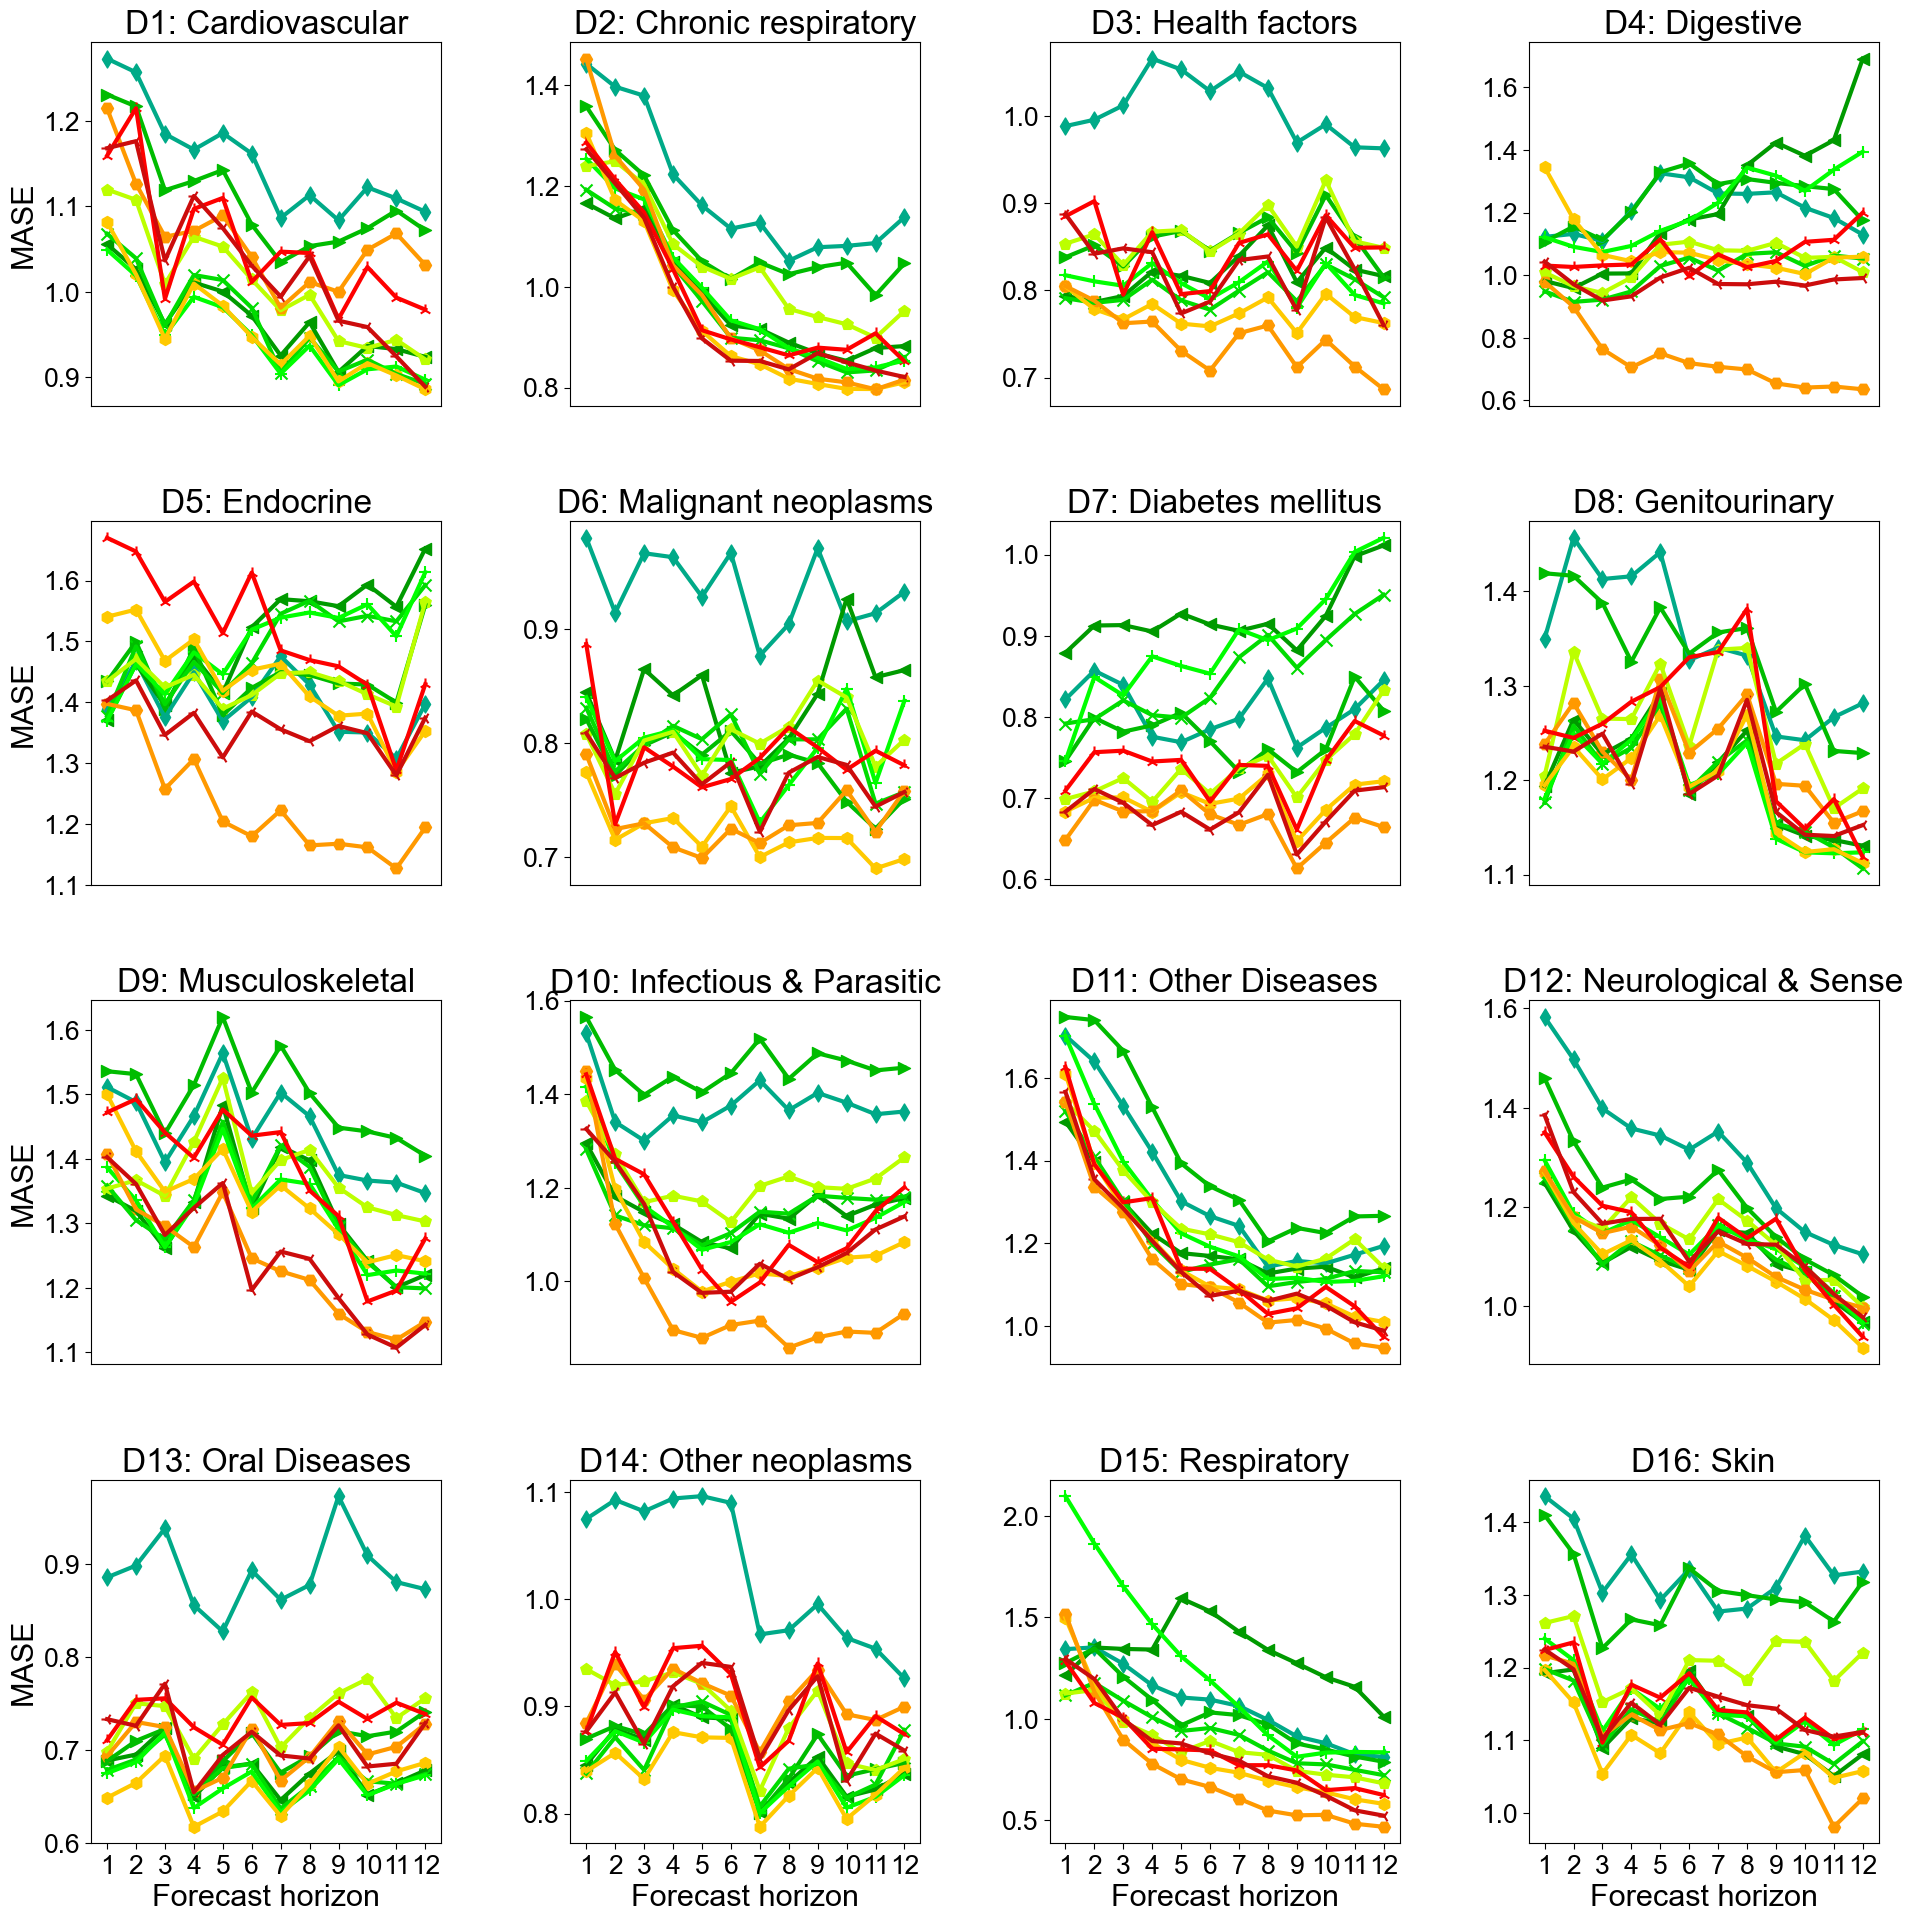

In [8]:
def plot_by_disease(target_variables_file, error_metric_directory, error_metric, output_directory):
    labs = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16']
    disease_list = []
    with open(target_variables_file, 'r') as file:
        for line in file:
            # Remove linebreak which is the last character of the string
            target_variable = line[:-1]
            # Add item to the list
            disease_list.append(target_variable)
            
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    fig.tight_layout(pad=5.0)
    
    for i, disease in enumerate(disease_list): 
        row, col = divmod(i, 4)
        ax = axs[row, col]
        
        error_df = create_error_df(disease, error_metric_directory, error_metric)
        if error_metric == 'MAPE':
            error_df = error_df * 100

        legend_handles = []
        
        for model in error_df.columns.values[np.r_[5:11, 12:16]]:   
            color = color_picker(model)
            marker = marker_picker(model)

            line, = ax.plot(error_df.index.values, error_df[model], linestyle='-', linewidth=3, color=color)
            scatter = ax.scatter(error_df.index.values, error_df[model], marker=marker, s=75, color=color)
            # Create a legend handle combining line and scatter
            legend_handle = mpl.lines.Line2D([], [], color=line.get_color(), marker=marker, linestyle=line.get_linestyle(), markersize=10, linewidth=3)
            legend_handles.append((legend_handle, all_models.get(model, model)))
            
        ax.set_title(f'{labs[i]}: {rename_disease(disease)}', fontsize=24)
        if row == 3:
            ax.set_xlabel('Forecast horizon', fontsize=22)
            x_ticks = np.arange(1, len(error_df.index.values)+1)  # Assuming error_df.index.values are numerical
            ax.set_xticks(x_ticks)
            ax.set_xticklabels(error_df.index.values)
        else:
            ax.set_xticklabels([])
            ax.set_xticks([])
            
        if col == 0:
            ax.set_ylabel(error_metric, fontsize=22)
            
#         if row == 0 and col == 0:
#             handles, labels = zip(*legend_handles)
#             ax.legend(handles, labels, bbox_to_anchor=(-0.25, 1.1), loc=0, borderaxespad=0, fontsize=24)
            
        ax.tick_params(axis='both', labelsize=19) 
    

    plt.savefig(os.path.join(output_directory, 'casue_specific_MASE.pdf'))
    
        
plot_by_disease('selected_variables.txt', 'error_metrics', 'MASE', 'all causes')

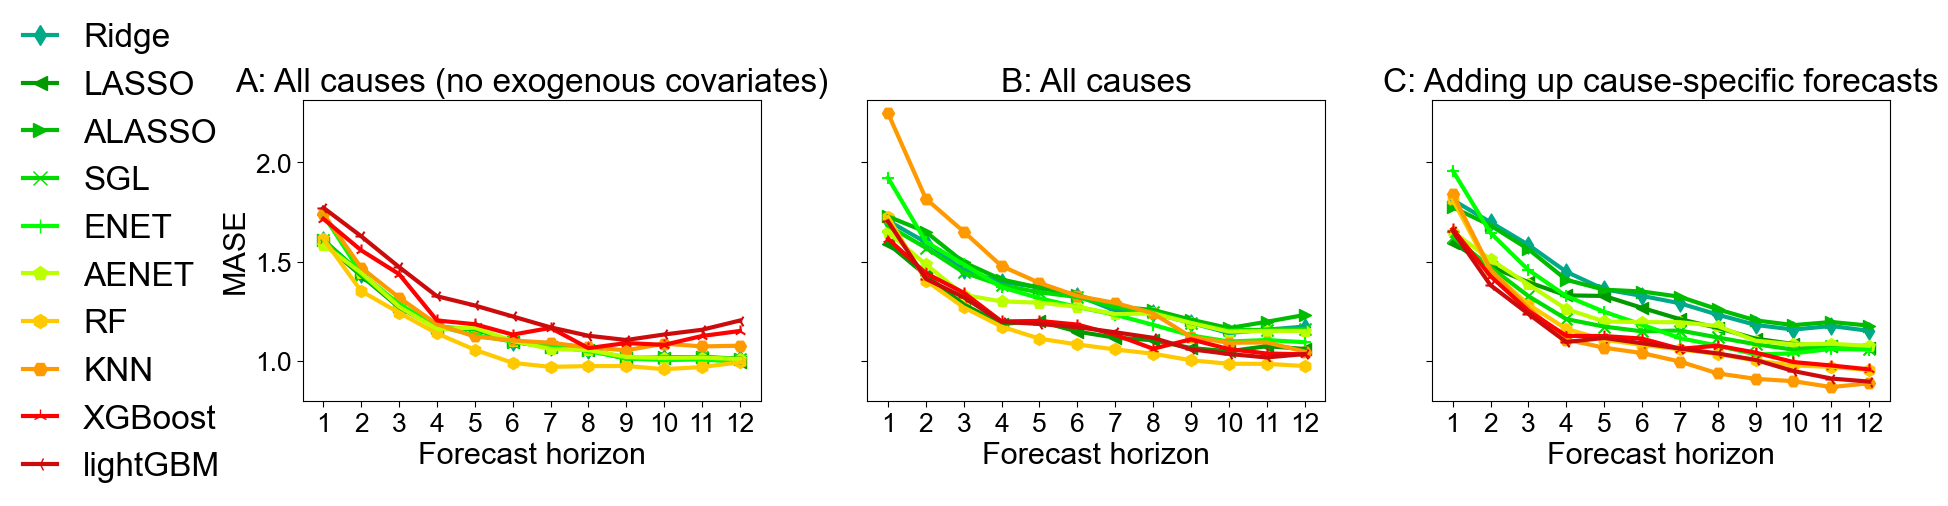

In [10]:
def plot_all_causes(target_var, error_metric_directory, error_metric_1_directory, error_metric_add_directory, error_metric, output_directory):
    labs = ['A', 'B', 'C']
            
    fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.tight_layout(pad=5.0)

    error_df = create_error_df(target_var, error_metric_directory, error_metric)
    error_df_1 = create_error_df(target_var, error_metric_1_directory, error_metric)
    error_df_add = create_error_df(target_var, error_metric_add_directory, error_metric)
    error_list = [error_df_1, error_df, error_df_add]
    
    titles = {}
    title_list = ['All causes (no exogenous covariates)', 'All causes', 'Adding up cause-specific forecasts']
    for i, (ax, error_df) in enumerate(zip(axs, error_list)): 
        
        if error_metric == 'MAPE':
            error_df = error_df * 100

        legend_handles = []
        
        for model in error_df.columns.values[np.r_[0:10]]:   
            color = color_picker(model)
            marker = marker_picker(model)

            line, = ax.plot(error_df.index.values, error_df[model], linestyle='-', linewidth=3, color=color)
            scatter = ax.scatter(error_df.index.values, error_df[model], marker=marker, s=75, color=color)
            # Create a legend handle combining line and scatter
            legend_handle = mpl.lines.Line2D([], [], color=line.get_color(), marker=marker, linestyle=line.get_linestyle(), markersize=10, linewidth=3)
            legend_handles.append((legend_handle, all_models.get(model, model)))
            
        ax.set_title(f'{labs[i]}: {title_list[i]}', fontsize=24)
        
        ax.set_xlabel('Forecast horizon', fontsize=22)
        x_ticks = np.arange(1, len(error_df.index.values)+1)  # Assuming error_df.index.values are numerical
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(error_df.index.values)
            
        if i == 0:
            ax.set_ylabel(error_metric, fontsize=22)

        if i == 0:
            handles, labels = zip(*legend_handles)
            ax.legend(handles, labels, bbox_to_anchor=(-0.15, 1.3), loc=0, borderaxespad=0, fontsize=24, frameon=False, handlelength=1)
            
        ax.tick_params(axis='both', labelsize=19) 
    
    plt.savefig(os.path.join(output_directory, 'all_causes_MASE.pdf'), bbox_inches='tight')
    

plot_all_causes('all causes', 'error_metrics', 'error_metrics_1', 'error_metrics_add', 'MASE', 'all causes')